### Задание 1

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

Результат классификации запишите в отдельный столбец region.

In [96]:
geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [97]:
import pandas as pd
df = pd.read_csv('keywords.csv')
df.head(10)

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195
5,одноклассники моя страница,19976138
6,майл,15144673
7,авито,14786593
8,переводчик,14453469
9,яндекс,13344734


In [217]:
def region(row):
    for key, values in geo_data.items():
        for i in range(len(values)):
            if values[i] in row['keyword']:
                return key
    return 'undefined'
df['region'] = df.apply(region, axis=1)
df.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


### Задание 2

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
    - оценка 2 и меньше - низкий рейтинг
    - оценка 4 и меньше - средний рейтинг
    - оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [138]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [153]:
def cl(row):
    if row['rating'] <= 2:
        return 'низкий рейтинг'
    elif row['rating'] <= 4:
        return 'средний рейтинг'
    else:
        return 'высокий рейтинг'
ratings['class'] = ratings.apply(cl, axis=1)
ratings.head(10)

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,средний рейтинг
1,1,3,4.0,964981247,средний рейтинг
2,1,6,4.0,964982224,средний рейтинг
3,1,47,5.0,964983815,высокий рейтинг
4,1,50,5.0,964982931,высокий рейтинг
5,1,70,3.0,964982400,средний рейтинг
6,1,101,5.0,964980868,высокий рейтинг
7,1,110,4.0,964982176,средний рейтинг
8,1,151,5.0,964984041,высокий рейтинг
9,1,157,5.0,964984100,высокий рейтинг


### Задание 3

Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.

In [267]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [240]:
#Применим группировку, чтобы посчитать сколько каждый пользователь выставил оценок
df2 = ratings.groupby('userId').count().reset_index()
#Оставим только тех, кто удовлетворяет нашему условию (кол-во оценок >= 100)
df2_100 = df2[df2['movieId'] >= 100]
#Сохарним нужные нам ID в список ids
ids = df2_100['userId'].tolist()

In [256]:
from datetime import datetime

k = ratings.groupby('userId').agg(['min','max'])['timestamp'].reset_index()
def defdays(row, ids):
    if row['userId'] in ids:
        return (datetime.fromtimestamp(row['max'])-datetime.fromtimestamp(row['min'])).days        
    return False

k['days'] = k.apply(defdays, ids=ids, axis=1)
k = k[k['days'] != False][['userId','days']]
k.head(10)

,userId,days
0,1,8
3,4,723
6,7,804
9,10,3
14,15,2443
16,17,245
17,18,922
19,20,1
20,21,1433
21,22,4


In [266]:
print('Среднее lifetime value для киноманов =', k.agg({'days': 'mean'})[0], 'дней') #но неплохо бы исключить отсюда ботов

Среднее lifetime value для киноманов = 763.5240963855422 дней


### Задание 4

Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов...

1. В переменную years запишите список из всех годов с 1950 по 2010.
2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
    - для каждой строки пройдите по всем годам списка years
    - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'
4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

In [330]:
movies_ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
years = [str(x) for x in range(1950,2011)]
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [339]:
def production_year(row):
    for i in years:
        if i in row['title']:
            return i
    return 1900
movies['year'] = movies.apply(production_year, axis = 1)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [364]:
#Скорее всего две таблицы необходимо сджойнить, поэтому подготовим датафрейм с рейтингами и рассчитаем средний рейтинг для каждого
#movieId

movies_ratings = movies_ratings.groupby('movieId').agg({'rating':'mean'})
movies_ratings.sort_values('rating', ascending=False).head(10)

,rating
movieId,
88448,5.0
100556,5.0
143031,5.0
143511,5.0
143559,5.0
6201,5.0
102217,5.0
102084,5.0
6192,5.0


In [361]:
joined = movies_ratings.merge(movies, on='movieId', how='left')
#len(movies_ratings) == len(joined)
joined.sort_values('rating',ascending=False).head()

,movieId,rating,title,genres,year
7638,88448,5.0,NaN,NaN,NaN
8089,100556,5.0,"Act of Killing, The (2012)",Documentary,1900
9065,143031,5.0,NaN,NaN,NaN
9076,143511,5.0,NaN,NaN,NaN
9078,143559,5.0,NaN,NaN,NaN


In [363]:
s = joined.groupby('year').agg({'rating':'mean'}).sort_values('rating', ascending=False)
s.head(20)

,rating
year,
1952,3.823205
1957,3.801286
1973,3.736052
1955,3.686659
1976,3.685161
1972,3.676674
1971,3.670558
1969,3.630792
1951,3.629933


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b250518>]],
      dtype=object)

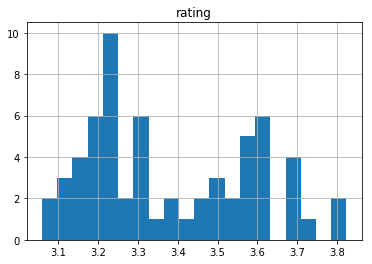

In [352]:
s.hist(bins=20)